In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [10]:
def Canny_detector(img, weak_th=None, strong_th=None):
    """
    Applies Canny edge detection to the input image.

    Args:
    - img: Input image.
    - weak_th: Weak threshold for double thresholding step.
    - strong_th: Strong threshold for double thresholding step.

    Returns:
    - mag: Magnitude of gradients of edges.
    """
    # Conversion of image to grayscale
    if len(img.shape) == 3:  # Ensure input image is grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Noise reduction step
    img = cv2.GaussianBlur(img, (5, 5), 1.4)

    # Calculating the gradients
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)

    # Conversion of Cartesian coordinates to polar
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees=True)

    # Setting default thresholds if not provided
    mag_max = np.max(mag)
    if weak_th is None:
        weak_th = mag_max * 0.05
    if strong_th is None:
        strong_th = mag_max * 0.5

    # Double thresholding step
    weak_ids = mag < weak_th
    strong_ids = mag > strong_th
    ids = np.zeros_like(img)
    ids[strong_ids] = 255  # Strong edges
    ids[np.logical_and(mag <= strong_th, mag >= weak_th)] = 50  # Weak edges

    # Non-maximum suppression step
    for i in range(1, img.shape[0] - 1):
        for j in range(1, img.shape[1] - 1):
            if ids[i, j] == 50:  # Weak edge
                if np.any(ids[i - 1:i + 2, j - 1:j + 2] == 255):
                    ids[i, j] = 255

    return ids


In [11]:
def calculate_area(contours):
    """
    Calculate the area of the largest contour.

    Args:
    - contours: List of contours detected in the image.

    Returns:
    - area: Area of the largest contour.
    """
    if len(contours) == 0:
        return 0
    max_contour = max(contours, key=cv2.contourArea)
    area = cv2.contourArea(max_contour)
    return area


In [12]:
frame = cv2.imread('Image_Whole_Area/02_01.JPG')


# calling the designed function for
# finding edges
canny_img = Canny_detector(frame)

# print(canny_img)

In [13]:
# Find contours in the Canny image
contours, _ = cv2.findContours(canny_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [14]:
len(contours)

25298

In [15]:
RATIO_PIXEL_TO_M=20 #65 pixels is in  1m
RATIO_PIXEL_TO_SQUARE_M=20*20
# Calculate the area of the largest contour
area = calculate_area(contours)
area_m=round(area/RATIO_PIXEL_TO_SQUARE_M,2)
print(area_m)


14510.07


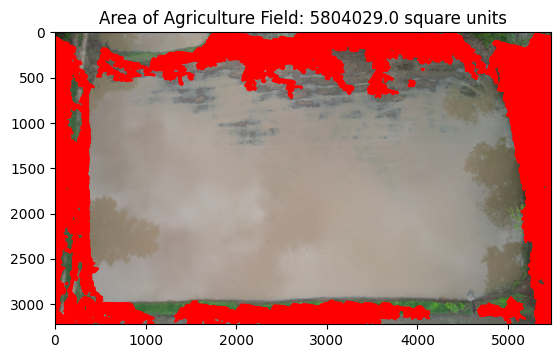

In [16]:
# Displaying the input image with detected contour
plt.figure()
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.contour(canny_img, levels=[100], colors='r', linestyles='-')
plt.title(f"Area of Agriculture Field: {area} square units")
plt.show()

<Figure size 640x480 with 0 Axes>

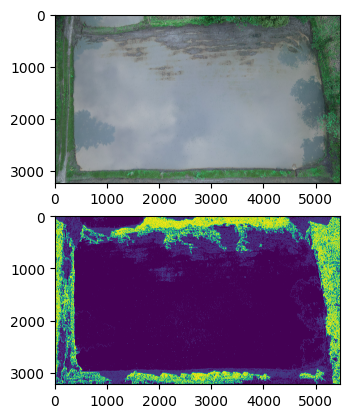

In [17]:
# Displaying the input and output image 
plt.figure() 
f, plots = plt.subplots(2, 1) 
plots[0].imshow(frame) 
plots[1].imshow(canny_img) 
